In [1]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Dropout

Using TensorFlow backend.


In [2]:
num_classes = 10
im_rows= 32
im_cols= 32
im_size = im_rows * im_cols*3

In [3]:
#데이터 읽어 들이기
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
#데이터를 1차원 배열로 변환하기
X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255

#레이블 데이터를 One-hot 형식으로 변환하기
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [5]:
#모델 정의하기
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (im_size,)))
model.add(Dense(num_classes, activation = 'softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [6]:
#모델 컴파일하기
model.compile(
loss = 'categorical_crossentropy',
optimizer = 'adam',
metrics = ['accuracy'])

In [7]:
#학습하기
hist = model.fit(X_train, y_train,
                batch_size = 32, epochs = 50,
                verbose = 1,
                validation_data = (X_test, y_test))


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 66s 1ms/step - loss: 1.8820 - accuracy: 0.3316 - val_loss: 1.7162 - val_accuracy: 0.3804
Epoch 2/50
50000/50000 [==============================] - 64s 1ms/step - loss: 1.7067 - accuracy: 0.3913 - val_loss: 1.6348 - val_accuracy: 0.4237
Epoch 3/50
50000/50000 [==============================] - 66s 1ms/step - loss: 1.6460 - accuracy: 0.4124 - val_loss: 1.6179 - val_accuracy: 0.4222
Epoch 4/50
50000/50000 [==============================] - 75s 1ms/step - loss: 1.5984 - accuracy: 0.4301 - val_loss: 1.5801 - val_accuracy: 0.4333
Epoch 5/50
50000/50000 [==============================] - 74s 1ms/step - loss: 1.5675 - accuracy: 0.4428 - val_loss: 1.5625 - val_accuracy: 0.4441
Epoch 6/50
50000/50000 [==============================] - 74s 1ms/step - loss: 1.5440 - accuracy: 0.4527 - val_loss: 1.5778 - val_accuracy: 0.4307
Epoch 7/50
50000/50000 [==============================] - 75s 2ms/s

In [8]:
#모델 평가하기
score = model.evaluate(X_test, y_test, verbose = 1)
print('정답률 = ', score[1], 'loss = ', score[0])

10000/10000 [==============================] - 2s 215us/step
정답률 =  0.4812000095844269 loss =  1.5059705728530883


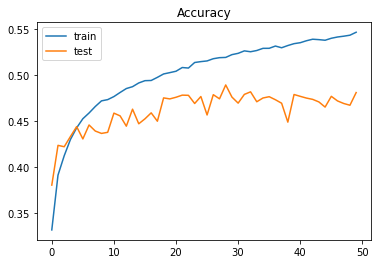

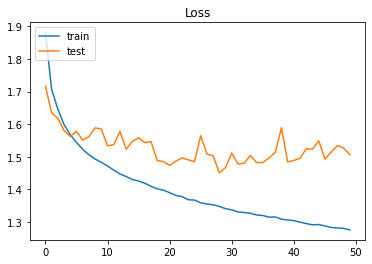

In [9]:
#학습 상태를 그래프로 그리기
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [10]:
#학습결과 저장하기
model.save_weights('cifar10_MLP-weight.h5')

In [11]:
#학습결과 불러오기
model.load_weights('cifar10_MLP-weight.h5')